In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
#Load Data
df = pd.read_csv(r"C:\Users\SATYA\OneDrive\Desktop\train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
print(df.shape)

(891, 12)


C:\Users\SATYA\AppData\Local\Temp\ipykernel_17552\1821895278.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = "YlGnBu")


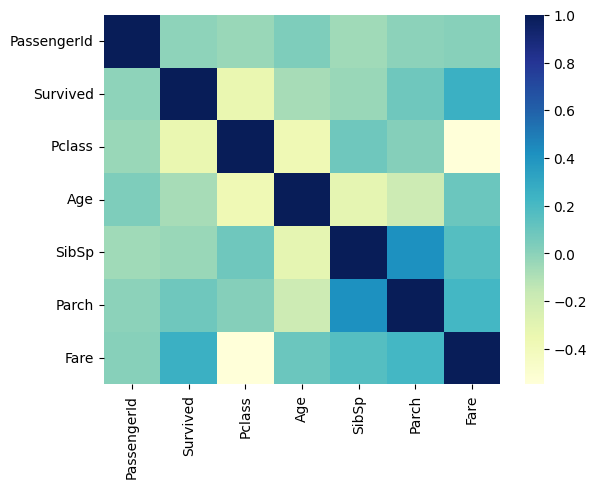

In [5]:
sns.heatmap(df.corr(), cmap = "YlGnBu")
plt.show()

In [6]:
#Columns to drop
df = df.drop(['Name', 'Cabin', 'Ticket'], axis = 1)

In [7]:
#Checking for Missing Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [8]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df['Embarked'].fillna('S', inplace = True)

In [10]:
df=df.fillna(df.mean())

C:\Users\SATYA\AppData\Local\Temp\ipykernel_17552\3358723971.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#Type Casting
df['Age'] = df['Age'].astype('int64')
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age              int64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [14]:
#Checking for Duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [15]:
#Finding the number of prople survied or not
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

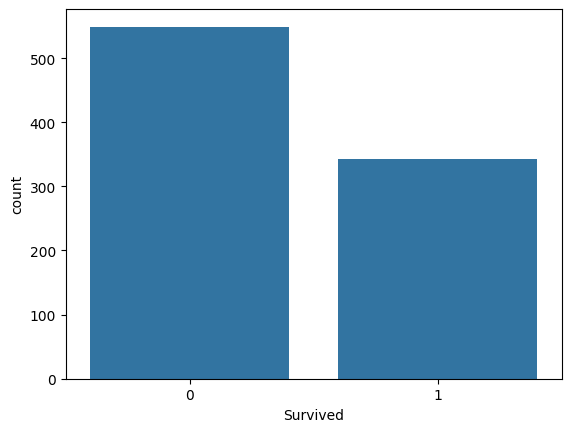

In [16]:
#Count Plot
sns.countplot(x ='Survived', data = df)

In [17]:
#Encoding the categorical column
df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7.2500,0
1,2,1,1,1,38,1,0,71.2833,1
2,3,1,3,1,26,0,0,7.9250,0
3,4,1,1,1,35,1,0,53.1000,0
4,5,0,3,0,35,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13.0000,0
887,888,1,1,1,19,0,0,30.0000,0
888,889,0,3,1,29,1,2,23.4500,0
889,890,1,1,0,26,0,0,30.0000,1


<Axes: xlabel='Sex', ylabel='count'>

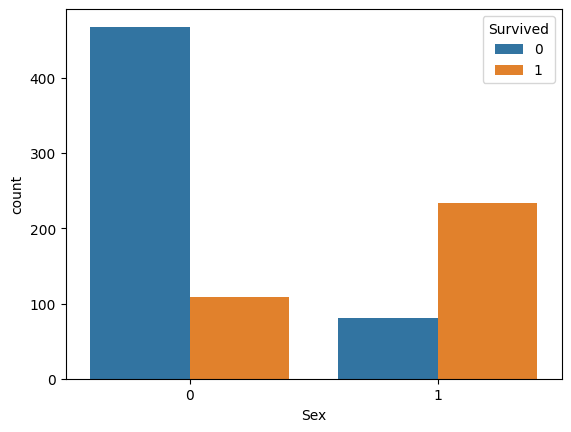

In [18]:
sns.countplot(x ='Sex', hue = 'Survived', data = df)

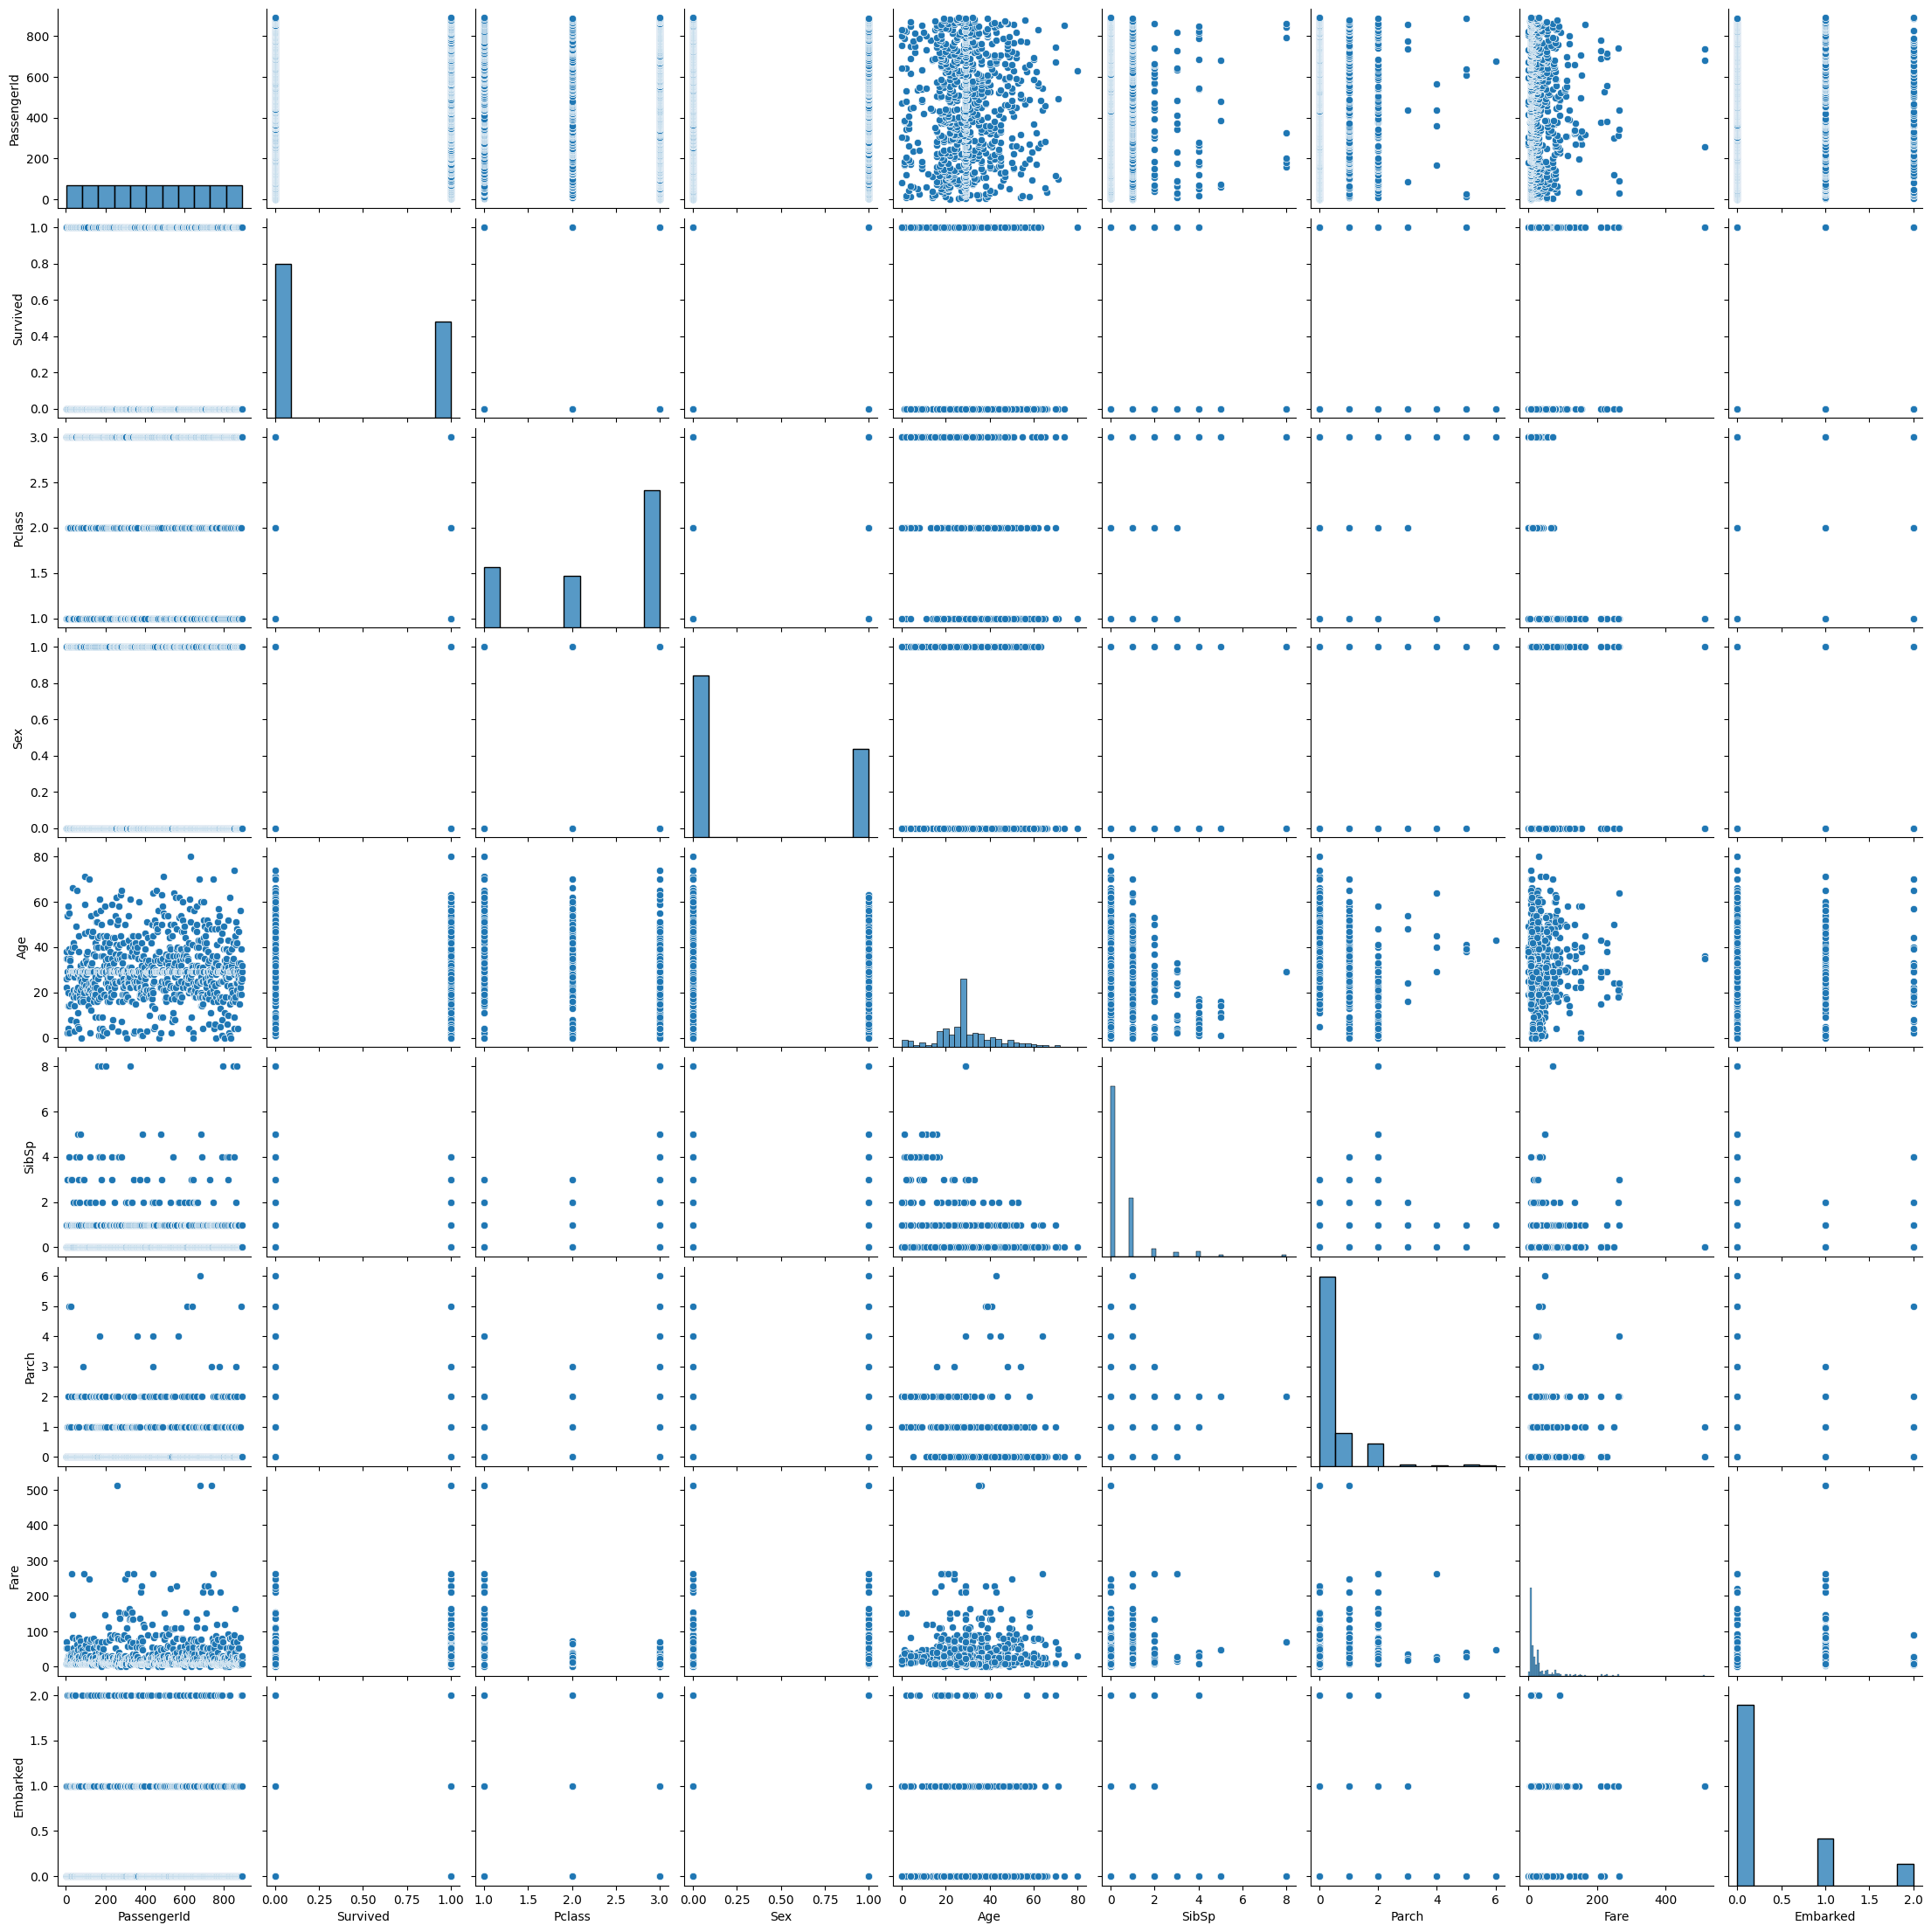

In [19]:
#Pairplot
sns.pairplot(df)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7.2500,0
1,2,1,1,1,38,1,0,71.2833,1
2,3,1,3,1,26,0,0,7.9250,0
3,4,1,1,1,35,1,0,53.1000,0
4,5,0,3,0,35,0,0,8.0500,0


In [21]:
#Split the dataset into Train data and Test data
x = df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df[['Survived']]

In [22]:
#Split the dataset into Train data and Test data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

print('Train data: ', X_train.shape, Y_train.shape)
print('Test data: ', X_test.shape, Y_test.shape)

Train data:  (712, 8) (712, 1)
Test data:  (179, 8) (179, 1)


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [24]:
classifier = DecisionTreeClassifier()

In [25]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
accuracy_score(y_pred, Y_test)

0.7374301675977654

In [29]:
df_new = pd.read_csv(r"C:\Users\SATYA\OneDrive\Desktop\test.csv")

In [30]:
#Columns to drop
df_new = df_new.drop(['Name', 'Cabin', 'Ticket'], axis = 1)

In [31]:
df_new.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [32]:
passengerId = df_new['PassengerId'].values

In [33]:
df_new['Fare'].fillna(df_new['Fare'].mean(), inplace = True)
df_new = df_new.fillna(df_new.mean())
df_new['Age'] = df_new['Age'].astype('int64')
df_new.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

C:\Users\SATYA\AppData\Local\Temp\ipykernel_17552\334095139.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new = df_new.fillna(df_new.mean())


In [34]:
x_final = df_new.iloc[:,:].values

In [35]:
y_final = classifier.predict(x_final)

C:\Users\SATYA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [36]:
y_final.shape

(418,)

In [37]:
passengerId.shape

(418,)

In [38]:
final = pd.DataFrame()

In [39]:
final['passengerId'] = passengerId
final['Survived'] = y_final

In [40]:
final.to_csv('Finalsubmission.csv',index = False)